
# Project: Investigate a Dataset - [TMDb Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### Overview

##### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue of movies between 1960 - 2015.

##### Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### from this data set we can Conclude 
### Question(s) for Analysis:
*  Which Movies had the maximum and minimum profits , budgets & revenus?
*  Which Movies had longest and shortest runtimes & it's average?
*  In which year was the highest profits?
*  What is the top list of movie genres from year to year?
*  what is the Most common Cast?
*  What is the relation between vote count and the movie ratings?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


 Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### General Properties
#### here we load our data and take alook at its stats & descriptions

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info(),
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


*  let's take a look at the histograms of this data columns

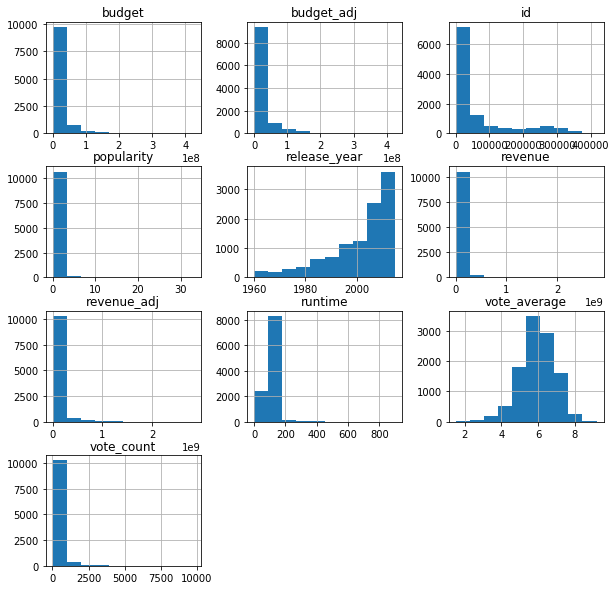

In [5]:
df.hist(figsize=(10,10));

#### it shows many '0' values among this dataset

### Obsevations: 
*  There are some unimportant columns in the dataset, That will be removed :
_____
1. imdb_id
2. overview
3. homepage
4. tagline
5. release_date ..etc
______
*   Many rows contains several values, seperated by "|"  like in rows : 
______
1. cast
2. genres ..etc
###### - We will need to split them
then we remove all unneeded columns
______
* the last two columns(revenue_adj,budget_adj) is shown as exponential values
so we can change that

In [6]:
#https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

*  df.info(), df.describe() & also the histogramms shows that we have alot of '0' values in some columns that we need to get rid of


### Data Cleaning

 

#### 1st dealing with the "0" values
-  Some columns like "budget_adj", "revenue_adj" have alot of '0's in thier rows we will drop them after replacing it with 'NAN' values


In [7]:
df['runtime'].replace(0, np.NAN, inplace=True)

df['revenue'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)

df['budget'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

#### 2nd Removing dublicate rows "if found" .

In [8]:
df.duplicated().sum()

0

* Didn't have dublicate rows

#### 3rd dealing with everal values, seperated by "|"  .
* we can split them across new columns so it remains in the same movie's row .

In [8]:
#sourses:https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
#https://stackoverflow.com/questions/48958282/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python
'''we can put the new columns the "splited ones" into a small data frame and merge them later to the orignal df '''
df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_({x+1})"))
df_genr = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_({x+1})"))
df_prudc = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_({x+1})"))

#Checking df_c if split was conducted as intended
df_cast.head()

,cast_(1),cast_(2),cast_(3),cast_(4),cast_(5)
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [9]:
''' now we merge "join" our dataframes '''
df = df.join([df_cast, df_genr, df_prudc])
'''now drop columns we don't need '''
df = df.drop(['cast', 'keywords', 'genres', 'production_companies','id', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [10]:
df.shape

(1287, 26)

* let's check if there ara datatypes we need to edit. 

In [11]:
df.dtypes

popularity                  float64
budget                      float64
revenue                     float64
original_title               object
director                     object
runtime                     float64
vote_count                    int64
vote_average                float64
release_year                  int64
budget_adj                  float64
revenue_adj                 float64
cast_(1)                     object
cast_(2)                     object
cast_(3)                     object
cast_(4)                     object
cast_(5)                     object
genres_(1)                   object
genres_(2)                   object
genres_(3)                   object
genres_(4)                   object
genres_(5)                   object
production_companies_(1)     object
production_companies_(2)     object
production_companies_(3)     object
production_companies_(4)     object
production_companies_(5)     object
dtype: object

#### Every thing looks good. 

<a id='eda'></a>
## Exploratory Data Analysis


### lets calculate some conclusions from data
### Research Question 1 (Which Movies had the maximum and minimum profits , budgets & revenus?)


In [12]:
#profit is the subtraction of budget and revenue.
profits = df['revenue']-df['budget']
df.head(1)
#instering the new column for profits
'''  index, title,  data'''
df.insert(1,'profit',profits)
df.head(2)

,popularity,profit,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,...,genres_(1),genres_(2),genres_(3),genres_(4),genres_(5),production_companies_(1),production_companies_(2),production_companies_(3),production_companies_(4),production_companies_(5)
0,32.99,1363528810.00,150000000.00,1513528810.00,Jurassic World,Colin Trevorrow,124.00,5562,6.50,2015,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,28.42,228436354.00,150000000.00,378436354.00,Mad Max: Fury Road,George Miller,120.00,6185,7.10,2015,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None


In [13]:

def calc_max_min(column):
    #to get max
    max= df[column].idxmax()
    max_display=pd.DataFrame(df.loc[max])
    
    #to get min
    min= df[column].idxmin()
    min_display=pd.DataFrame(df.loc[min])
    
    #collectin data in one place
    res=pd.concat([min_display, max_display], axis=1)
    
    return res

def avg(column):
    return df[column].mean()


In [14]:
#calling the function with profit column
calc_max_min('profit')

,2244,1386
popularity,0.25,9.43
profit,-413912431.00,2544505847.00
budget,425000000.00,237000000.00
revenue,11087569.00,2781505847.00
original_title,The Warrior's Way,Avatar
director,Sngmoo Lee,James Cameron
runtime,100.00,162.00
vote_count,74,8458
vote_average,6.40,7.10
release_year,2010,2009


max_profit = 2544505847.00 for the movie "Avatar"<br>
min_profit = -413912431.00 for the movie "The Warrior's Way	"

In [15]:
#calling the function with revenue column
calc_max_min('revenue')

,2398,1386
popularity,0.03,9.43
profit,40.00,2544505847.00
budget,3.00,237000000.00
revenue,43.00,2781505847.00
original_title,Boy,Avatar
director,Taika Waititi,James Cameron
runtime,87.00,162.00
vote_count,26,8458
vote_average,7.30,7.10
release_year,2010,2009


max_revenue = 2781505847.00 for the movie "Avatar"<br>
min_revenue = 43.00 for the movie "Boy "

In [16]:
#calling the function with budget column
calc_max_min('budget')

,3581,2244
popularity,0.52,0.25
profit,1377.00,-413912431.00
budget,1.00,425000000.00
revenue,1378.00,11087569.00
original_title,"Love, Wedding, Marriage",The Warrior's Way
director,Dermot Mulroney,Sngmoo Lee
runtime,90.00,100.00
vote_count,55,74
vote_average,5.30,6.40
release_year,2011,2010


max_revenue = 425000000.00 for the movie "The Warrior's Way
"<br>
min_revenue = 1.00 for the movie "Love, Wedding, Marriage"

### let's get thier average : 


In [17]:
avg('profit'),avg('budget'),avg('revenue')

(124240946.33333333, 52003492.351981349, 176244438.68531469)

In [18]:
high_profs=df[df['profit'] >= 50000000]
high_profs.budget.mean()

76114232.51941748

* how long is the average runtime ?
* and what is it's min:max

### Research Question 2 (Which Movies had longest and shortest runtimes & it's average?)

In [19]:
calc_max_min('runtime')

,3424,4949
popularity,1.43,7.12
profit,-15540000.00,1024888979.00
budget,30000000.00,94000000.00
revenue,14460000.00,1118888979.00
original_title,Winnie the Pooh,The Lord of the Rings: The Return of the King
director,Stephen Anderson|Don Hall,Peter Jackson
runtime,63.00,201.00
vote_count,174,5636
vote_average,6.80,7.90
release_year,2011,2003


max_runtime = 201.00 for the movie "The Lord of the Rings: The Return of the King
"<br>
min_runtime = 63.00 for the movie "Winnie the Pooh"

In [20]:
#with avg of 
avg('runtime')

110.27350427350427

### Research Question 3 (In which year was the highest profits?)

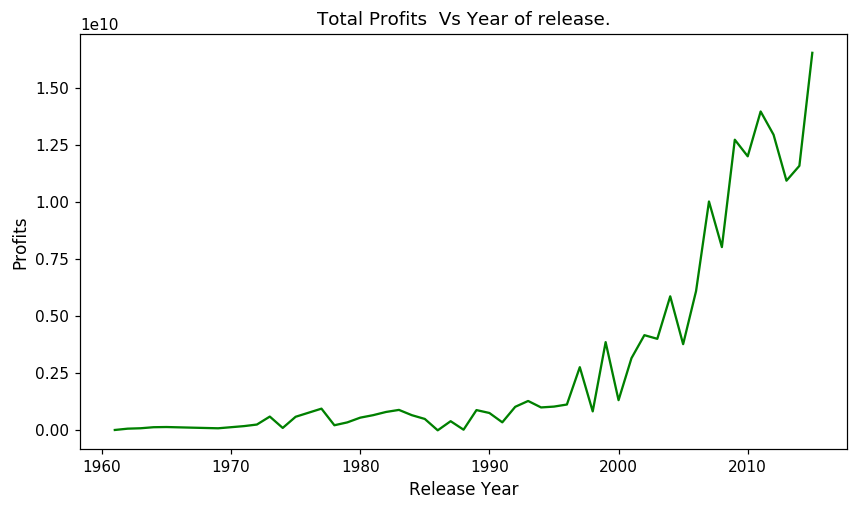

In [21]:
#let's see this on a Line plot 
#we need to group the profits by the year of release

rich_year = df.groupby('release_year')['profit'].sum()
#figure size(width, height)
plt.figure(figsize=(9,5), dpi = 110)

#add lables
plt.xlabel('Release Year', fontsize = 11)
plt.ylabel('Profits', fontsize = 11)
#title of the line plot
plt.title('Total Profits  Vs Year of release.')

#plotting the graph
plt.plot(rich_year,color='g')
plt.show()

*  profits is increasing quickly in the recent years specially in the 2000's 

In [22]:
# The year that has the highest profits
rich_year.idxmax()

2015

### Research Question 4  (What is the top list of movie genres from year to year?)

In [23]:
#now let's locate the 5 columns of geners we have
df_genre_sum = df.loc[:, 'genres_(1)': 'genres_(5)']
# joining release year to df_genre_sum for comparison
df_genres_years = df_genre_sum.join(df['release_year'])


In [24]:
#generates an array of years shown in release year 
years_list = df_genres_years['release_year'].unique()
#a list holding results for most frequent genres in particular years
most_frequent = [] 

#for loop to create the most_frequent list
for year in years_list:
    #filtering by years
    by_years = df_genres_years[df_genres_years['release_year'] == year] 
    
    #drop column "release_year" as it's repeated value 
    clear = by_years.drop(['release_year'], axis = 1)
    
    #value count through genres_(1) : genres_(5) getting the index of the maxcount 
    count = clear.stack().value_counts().idxmax() 

    #mask the DataFrame for respective years
    mask = df[df['release_year'] == year]
    
    #creates the mean of vote_average and stores the index of maximum value
    x = mask.groupby(['genres_(1)'])['vote_average'].mean().idxmax()
    if count == x:
        i = 'same'
    else:
        i = 'different'
    #appends year with counts trough genres_(1) : genres_(5), the max_avg of vote_average and shows if the resulting columns differ
    most_frequent.append((year, count, x, i))

#creates df for the list sorted by the release year with new index
df_most_popular = pd.DataFrame(most_frequent, columns=['release_year', 'popular_produced_genre', 'popular_voted_genre', 's/d']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular


,release_year,popular_produced_genre,popular_voted_genre,s/d
0,1961,Family,Comedy,different
1,1962,Action,Adventure,different
2,1963,Adventure,Action,different
3,1964,Action,Adventure,different
4,1965,Action,Adventure,different
5,1967,Adventure,Action,different
6,1969,Action,Adventure,different
7,1971,Thriller,Action,different
8,1972,Crime,Drama,different
9,1973,Thriller,Drama,different


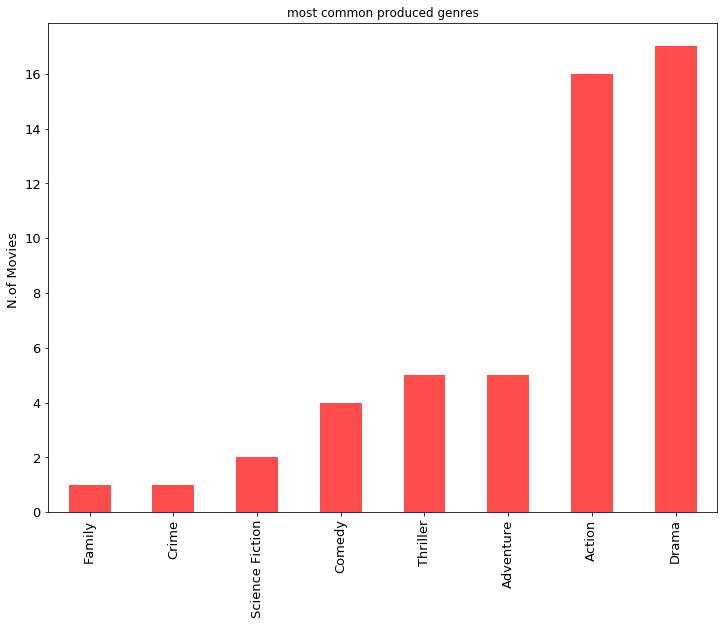

In [25]:

count = df_most_popular['popular_produced_genre'].value_counts(ascending = False)

#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.bar(color = 'r', alpha= 0.7, fontsize = 13)

#title
lt.set(title = 'most common produced genres')

# on x axis
lt.set_ylabel('N.of Movies ', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

*  drama is taking the first place and the bigger share , followed by the action genre

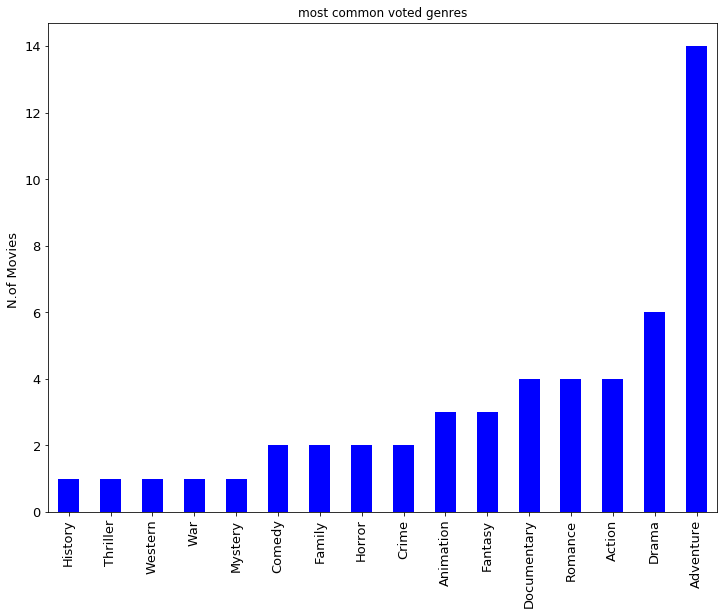

In [26]:
count2 = df_most_popular['popular_voted_genre'].value_counts(ascending = False)

#lets plot the points in descending order top to bottom as we have data in same format.
count2.sort_values(ascending = True, inplace = True)
#ploting
lt2 = count2.plot.bar(color = 'b', fontsize = 13)
#title
lt2.set(title = 'most common voted genres')
# on x axis
lt2.set_ylabel('N.of Movies ', color = 'black', fontsize = '13')
#figure size(width, height)
lt2.figure.set_size_inches(12, 9)
#ploting the graph
plt.show()

*  adventure genre has a huge fan base over "drama" about 200%

In [27]:
df_most_popular['popular_produced_genre'].value_counts().idxmax()

'Drama'

In [28]:
df_most_popular['popular_voted_genre'].value_counts().idxmax()

'Adventure'

In [29]:
df_most_popular['s/d'].value_counts()


different    46
same          5
Name: s/d, dtype: int64

* voted genre wasn't always the most produced one

### Research Question 5 (what is the Most common Cast?)

In [30]:
#now let's locate the 5 columns of cast we have
dfmcc=df.loc[:, 'cast_(1)': 'cast_(5)']

dfmcc.stack().value_counts(ascending = False)[:10]


Matt Damon           22
Mark Wahlberg        19
Samuel L. Jackson    17
Anne Hathaway        16
Brad Pitt            16
Robert Downey Jr.    15
Jason Statham        15
George Clooney       15
Nicolas Cage         14
Harrison Ford        14
dtype: int64

*  Matt Damon,Mark Wahlberg & Samuel L. Jackson   
#### are common actors

   


*  the top cast 

In [31]:
dfmcc_high=high_profs.loc[:, 'cast_(1)': 'cast_(5)']
dfmcc_high.stack().value_counts(ascending = False)[:10]

Matt Damon           15
Anne Hathaway        12
Samuel L. Jackson    11
Liam Neeson          11
Mark Wahlberg        11
Cameron Diaz         11
Brad Pitt            11
Johnny Depp          11
Tom Cruise           11
Michael Caine        10
dtype: int64

In [32]:
df['director'].value_counts(ascending = False)[:10]

John Carpenter       12
Steven Spielberg     11
Steven Soderbergh    10
Clint Eastwood        8
Robert Zemeckis       8
Peter Jackson         8
Ridley Scott          8
Ron Howard            7
Christopher Nolan     7
David Fincher         7
Name: director, dtype: int64

*  John Carpenter,Steven Spielberg & Steven Soderbergh  
#### are common directors

### Research Question 5 (What is the relation between vote count and the movie ratings?)

In [34]:
#locate 'vote_count' and 'vote_average' 
#vote_average represents "rating"
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results we take movies with more than 1500 votes
df_vote_slice = df_vote[df_vote['vote_count'] > 1500]

#### let's take a look at thier SCATTER plots and their corralation

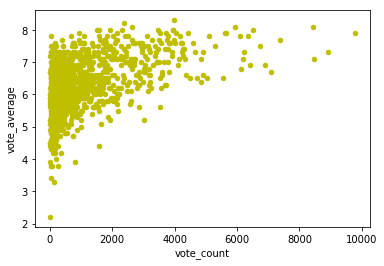

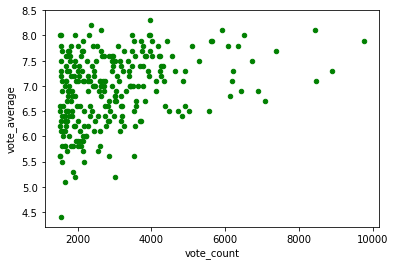

In [35]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter',color='y' );
df_vote_slice.plot(x='vote_count', y='vote_average', kind='scatter',color='g');

In [36]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.00,0.46
vote_average,0.46,1.00


In [37]:
df_vote_slice.corr()

,vote_count,vote_average
vote_count,1.00,0.33
vote_average,0.33,1.00


*  it didn't show that movies with a higher vote count received higher rates. even with more than 1500 vote_count it didn't change the observations.
<br>
*  also the corralation didn't show that higher vote counts result in higher rates.

<a id='conclusions'></a>
## Conclusions
the movie avatar by james cameron had the highest profits & revenue.
<br>
the movie The Warrior's Way by Sngmoo Lee had the highest budget with 425M vs Love, Wedding, Marriage by Dermot Mulroney which had just a one dollar for budget.
<br>
* average budget to produce a movie is about 52M$
* average runtime 110 minutes 
<br>
*  movie industry profits kept increacing from 1960 till it hits the max in 2015
<br>
the most common produced movie genres are drama and action but the adventure genre wins with the most voted
the most popular genre differed a lot across years with too many occasions that the produced genre wasn't the voted one
*  to produce a profitable and successful movie you need :

1. Average Budget be around 76 millon dollar
2. Average duration of 110 minutes 
3. should be in the cast :Matt Damon, Anne Hathaway, Mark Wahlberg, Brad Pitt,<br> Liam Neeson, Tom Cruise, Cameron Diaz , Samuel L.Jackson & Johnny Depp
4. Genre must be : Action, Adventure & Drama




### Limitations
1-All results are limited to the used data set and no advaned statistics were performed so results can not be general.
<br>
2-many entries in the dataset have been removed due to missing values


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])